In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
data=pd.read_csv('delivery_time.csv')

In [36]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Performing EDA

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


We can see that there are no null values in the data

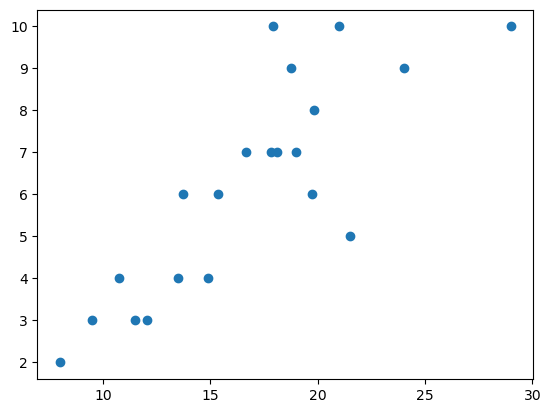

In [38]:
data=data.rename(columns={'Delivery Time':'Delivery','Sorting Time':'Sorting'})
plt.scatter(data.Delivery,data.Sorting)

Correlation

In [39]:
data.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


We see that correlation is also around 0.8 which states that it is strong

C:\Users\MD SUFIYA\AppData\Local\Temp\ipykernel_10112\4134459694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery'])


<Axes: xlabel='Delivery', ylabel='Density'>

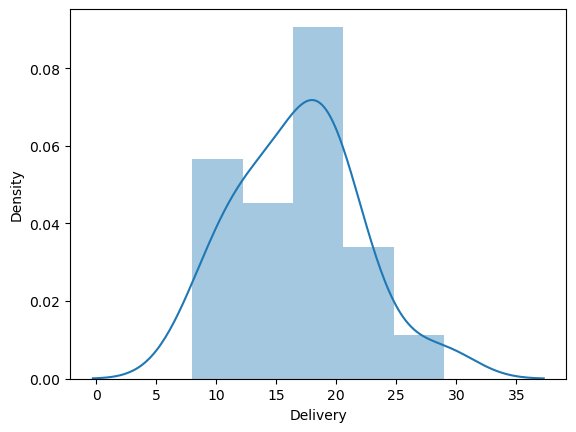

In [42]:
sns.distplot(data['Delivery'])

C:\Users\MD SUFIYA\AppData\Local\Temp\ipykernel_10112\1934190821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting'])


<Axes: xlabel='Sorting', ylabel='Density'>

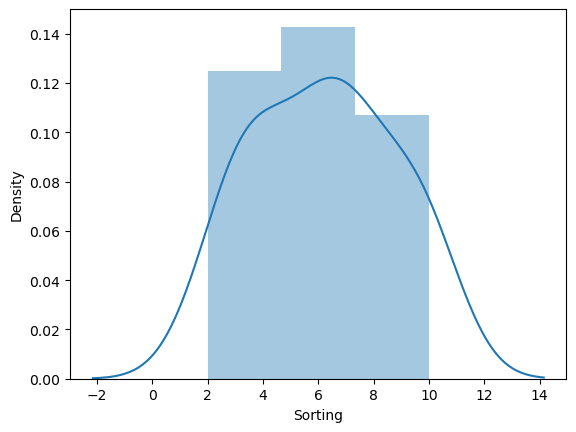

In [43]:
sns.distplot(data['Sorting'])

# Model Building 

In [44]:
import statsmodels.formula.api as smf
model=smf.ols('Delivery~Sorting',data=data).fit()

<Axes: xlabel='Delivery', ylabel='Sorting'>

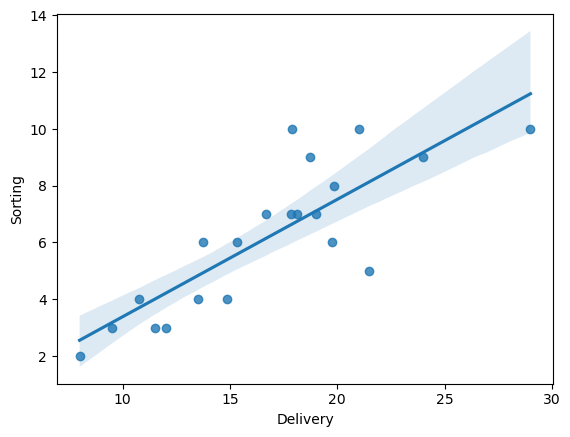

In [45]:
sns.regplot(x='Delivery',y='Sorting',data=data)

In [46]:
#Coefficients
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [47]:
#t values and p value
print(model.tvalues,'\n',model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [48]:
#rsquared values
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Predict new datapoint

In [49]:
#lets predict a new datapoint for sorting time 2 and 4
newdata=pd.Series([2,4])

In [52]:
data_pred=pd.DataFrame(newdata,columns=['Sorting'])
data_pred

,Sorting
0,2
1,4


In [53]:
model.predict(data_pred)

0     9.880774
1    13.178814
dtype: float64